<h1 align="center"> Redes Neuronales: Perceptrón Simple </h1>

<h2 align="center"> MEA - 2021 

Docente: José I. Robledo </h2>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptrón simple

Se puede decir que el perceptrón simple es la unidad básica de inferencia en forma de discriminador lineal a partir de la cual se desarrollan una gran cantidad de algoritmos en el campo de las redes neuronales. Se puede hacer la analogía de pensar al perceptrón simple como una neurona aritificial y al combinarse y utilizarse con otras neutronas artificiales puede formar una red neutronal artificial. Este algoritmo fue creado por Frank Rosenblatt en 1960. 

Supongamos que tenemos $N$ variables o *señales de entrada* $x_i$ con $i=1,...,N$. Además consideremos $x_0 = 1$. El perceptrón simple se puede representar de la siguiente manera: 

$O^{(\mu)} = \sum_{i=0}^N w_{i} x_{i}^{(\mu)} = w \cdot x^{(\mu)}$,

en donde $O_i^{(\mu)}(h_i) $ es el resultado de la salida (ouput) del perceptrón para una observación $\mu$ de la base de datos ($\mu = 1, \dots, p$). Notar que para $i=0$, estamos agregando una constante $w_0$ que se llama Bias o sesgo. El resultado del perceptrón definido anteriormente será un valor real que podrá ser negativo o positivo. Para *activar* la neurona en base a la *señal de entrada*, definiremos una *función de activación* $\phi(O^{(\mu)})$ tal que

$\phi(O^{(\mu)}) = \begin{cases} -1 & \text{if } O^{(\mu)} \leq 0 \\ 1 & \text{if } O^{(\mu)} >0 \end{cases}$

Es decir que la función de activación permitirá que se active la neurona sí el valor de la combinación lineal resulta positivo. Veamos una representación gráfica (grafo) de un perceptrón simple para 5 señales de entrada:

[Visualización](https://es.wikipedia.org/wiki/Perceptr%C3%B3n#/media/Archivo:Perceptr%C3%B3n_5_unidades.svg).

Existen distintos tipos de funciones de activación. También resulta posible establecer como señales de entrada funciones no lineales de las variables.

En este ejercicio práctico vamos a programar un perceptrón simple para discriminar el siguiente conjunto de datos:

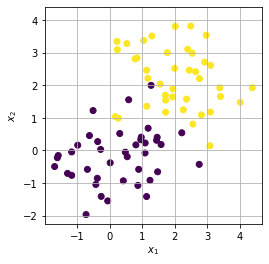

In [9]:
p = 40
mu1 = 0
mu2 = 2
sigma = 1
x1 = np.array([np.random.normal(mu1,sigma,p),np.random.normal(mu1,sigma,p)])
y1 = [-1 for i in range(0,p)]
x2 = np.array([np.random.normal(mu2,sigma,p),np.random.normal(mu2,sigma,p)])
y2 = [1 for i in range(0,p)]

X = np.hstack((x1,x2)).T
X = np.hstack((X,np.ones((p*2,1))))
y = y1 + y2

plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid()
plt.axis('square')
plt.show()

La variable $y$ contiene las etiquetas de cada observación y el array $X$ contiene el conjunto de datos total. En este caso, contamos con 2 variables, con lo cual $N=2$ y 40 puntos, con lo cual $\mu=1,\dots,40$. La expresión del perceptrón simple la podemos escribir así:

$O^{(\mu)} = w_0 + w_1 x_1 + w_2 x_2$.

Como podrán imaginarse, el secreto está en elegir los $w_i$ de manera adecuada tal que la neurona se active cuando corresponde a una clase y que se apague cuando corresponda a la otra clase. Programemos nuestro primer perceptrón:

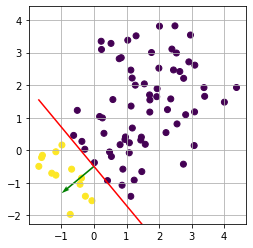

In [10]:
def comenzar_perceptron(w,X):
    '''Inicializamos el perceptrón con pesos w y
    luego nos fijamos el signo del resultado para
    predecir clase.'''
    h = np.dot(X,w.T)
    O = np.sign(h)
    y_pred = O.flatten().tolist()[0]
    return y_pred

#inicializamos los w_i
w = np.matrix(np.random.uniform(-1,1,3))
y_pred = comenzar_perceptron(w,X)

plt.scatter(X[:,0],X[:,1],c=y_pred)
origin = [0],[0]
plt.quiver(origin[0], origin[1] - w[0,2]/w[0,1],np.array(w[0,0]),np.array(w[0,1]),scale=4,color="green")
xtrial = np.arange(min(X[:,0]),max(X[:,0]),0.1)

# En esta parte visualizamos la línea discriminante dada por w_0 + w_1 * x_1 + w_2 * x_2 = 0.
separator = -1/(w[0,1]/w[0,0])*(xtrial) - w[0,2]/w[0,1]
plt.axis('square')
plt.plot(xtrial,separator,color="red")
plt.grid()
plt.show()


Como vemos, el hecho de elegir aleatoriamente los pesos $w_i$ resulta en un discriminante aleatorio que no tiene en cuenta las propiedades del conjunto de datos. Por lo tanto, debemos entrenar al perceptrón usando la información que tenemos sobre los datos y supervisando su aprendizaje, para que logre discriminar lo mejor que pueda el conjunto de datos en las dos clases existentes. Para esto es que vamos a utilizar dos conceptos: la minimización de una función de error y el descenso por el gradiente dado por la propagación hacia atrás de los pesos (backpropagation).  Existen diversas funciones de error que se pueden utilizar y está en el criterio del usuario y en las características de la base de datos en cuál función elegir. Por ahora, vamos a utilizar el error cuadrático medio para ejemplificar, dado por 

$E(w,x,t) = \frac{1}{2}\sum_i|O^{(\mu)} - t^{(\mu)}|^2$,

donde $t^{(\mu)}$ es la etiqueta de clase correspondiente a $x^{(\mu)}$.

Recordemos que 
$O^{(\mu)} =  w \cdot x^{(\mu)}$, con lo que el error cuadrático medio depende del vector de pesos $w$ elegido. Un método general para minimzar el error es el actualizar los parámetros de manera iterativa. El valor de los nuevos parámetros se calcula al sumar un incremento $\Delta w$ al valor actual: 

$w_{nuevo} = w_{anterior} + \Delta w $. 

El algoritmo se detiene cuando el error alcanza un mínimo valor deseado o bien cuando converge. Como la función que nosotros estamos utilizando para $O^{(\mu)}$ es diferenciable respecto a los parámetros $w_i$, podemos usar como algoritmo de aprendizaje el descenso por el gradiente. En este caso, el incremento de los parámetros se expresa como

$\Delta w = - \eta \frac{\partial E(w, x, t)}{\partial w}$,

donde $\eta$ es conocido como la tasa de aprendizaje y es un valor entre 0 y 1. La intuición del descenso se puede empezar a adquirir con las siguientes visualizaciones: [visualización 1](https://suniljangirblog.files.wordpress.com/2018/12/1-1.gif?w=379), [visualización 2](https://miro.medium.com/max/710/1*Sa5kGcZIVNTLjrI8P-YsSQ.gif).

Vamos a resumir toda esta información en las siguientes líneas de código, en donde entrenaremos el perceptrón simple con el método del descenso por el gradiente utilizando la función de error cuadrático medio! 



accuracy = 0.75
accuracy = 0.9
accuracy = 0.9125
accuracy = 0.875
accuracy = 0.9375
accuracy = 0.9125
accuracy = 0.9125
accuracy = 0.9375
accuracy = 0.9375
accuracy = 0.9375


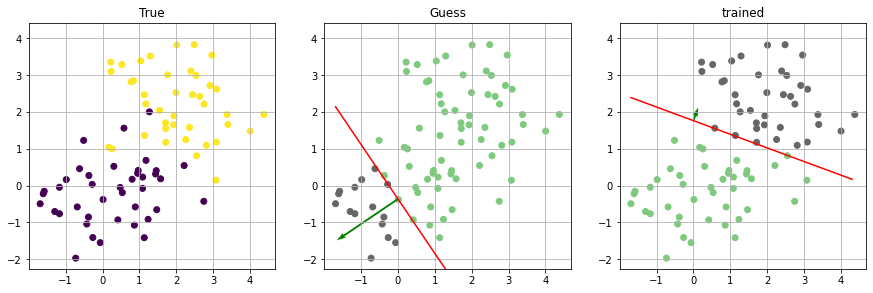

In [16]:
def activarPerceptron(w,X):
    '''Inicializamos el perceptrón con pesos w y
    luego nos fijamos el signo del resultado para
    predecir clase.'''
    h = np.dot(X,w.T)
    O = np.sign(h)
    y_pred = O.flatten().tolist()[0]
    return y_pred

def ECM(O,y):
    '''Función de error cuadrático medio'''
    return 0.5 * np.sum(np.square(np.array(y)-O))

def backPropagate(O,y,eta,w):
    '''Descenso por el gradiente, utilizando la derivada analítica del ECM'''
    deltaW = eta*np.array([np.sum((np.array(y)-O)*X[:,i]) for i in range(0,3)])
    w_new = w + deltaW
    return w_new

def accuracy(y_pred):
    '''Calcula la certeza o exactitud del clasificador'''
    print(f'accuracy = {np.sum(y_pred == np.array(y))/len(y)}')


#Initialize w
w = np.matrix(np.random.uniform(-1,1,3))
y_pred = activarPerceptron(w,X)

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('square')
plt.title("True")
plt.grid()

plt.subplot(1,3,2)
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap="Accent")
origin = [0],[0]- w[0,2]/w[0,1]
plt.quiver(*origin,np.array(w[0,0]),np.array(w[0,1]),scale=4,color="green")
xtrial = np.arange(min(X[:,0]),max(X[:,0]),0.1)
#Build up the discrimination line
separator = -1/(w[0,1]/w[0,0])*(xtrial) - w[0,2]/w[0,1]
plt.axis('square')
plt.plot(xtrial,separator,color="red")
plt.title("Guess")
plt.grid()

for i in range(0,1000):
    w = backPropagate(y_pred,y,0.005,w)
    y_pred = activarPerceptron(w,X)
    if i%100==0:
        accuracy(y_pred)

plt.subplot(1,3,3)
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap="Accent")
origin = [0],[0]- w[0,2]/w[0,1]
plt.quiver(*origin,np.array(w[0,0]),np.array(w[0,1]),scale=4,color="green")
xtrial = np.arange(min(X[:,0]),max(X[:,0]),0.1)
#Build up the discrimination line
separator = -1/(w[0,1]/w[0,0])*(xtrial) - w[0,2]/w[0,1]
plt.axis('square')
plt.plot(xtrial,separator,color="red")
plt.grid()
plt.title("trained")
plt.show()

Dado que python es un lenguaje orientado a objetos, la mayoría de los algoritmos de aprendizaje automático en python se programan en `clases`. Vamos a hacer el mismo perceptrón simple y entrenarlo igual, pero esta vez utilizando el concepto de `clase` de python, en donde se preserva la identidad, el comportamiento y estado.

In [17]:
class simplePerceptron():
    def __init__(self,X,plot='yes'):
        self.w = np.matrix(np.random.uniform(-1,1,3))
        self.X = X
        self.y_pred = self.activarPerceptron(self.w)
        if plot == 'yes':
            self.plot('Initialized guess')
            print('Great. Everything working!')
  
    def activarPerceptron(self, w):
        '''Hace un paso hacia adelante en el perceptrón'''
        h = np.dot(self.X,w.T)
        O = np.sign(h)
        y_pred = O.flatten().tolist()[0]
        return y_pred

    def ECM(self,O,y):
        '''Calcula el error cuadrático medio.'''
        return 0.5 * np.sum(np.square(np.array(y)-O))

    def backPropagate(self,O,y,eta):
        '''Propaga los pesos hacia atrás utilizando la derivada analítica
        del ECM.'''
        deltaW = eta*np.array([np.sum((np.array(y)-O)*self.X[:,i]) for i in range(0,3)])
        w_new = self.w + deltaW
        return w_new

    def accuracy(self,y, y_pred):
        '''Calcula la exactitud de clasificación.'''
        return np.sum(y_pred == np.array(y))/len(y)

    def train(self,y,n_ep=1000,eta=0.01):
        '''Método que realiza el entrenamiento de la neurona
        durante n_ep épocas, con una tasa de aprendizaje eta.'''
        for i in range(0,n_ep):
            w_new = self.backPropagate(self.y_pred,y,eta)
            forward = self.activarPerceptron(w_new)

            if self.accuracy(y, forward) >= self.accuracy(y, self.y_pred):
                self.y_pred = forward
                self.w = w_new
            else:
                rand = np.random.uniform(0,1)
                if rand<0.2:
                    self.y_pred = forward
                    self.w = w_new   
            print(f'Accuracy: {self.accuracy(y,self.y_pred)}, ECM: {self.ECM(self.y_pred,y)}')

    def plot(self,title):
        '''Grafica el resultado del perceptrón simple entrenado.'''
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,2)
        plt.scatter(self.X[:,0],self.X[:,1],c=self.y_pred,cmap="Accent")
        origin = [0],[0]- self.w[0,2]/self.w[0,1]
        plt.quiver(*origin,np.array(self.w[0,0]),np.array(self.w[0,1]),scale=4,color="green")
        xtrial = np.arange(min(self.X[:,0]),max(self.X[:,0]),0.1)
        #Build up the discrimination line
        separator = -1/(self.w[0,1]/self.w[0,0])*(xtrial) - self.w[0,2]/self.w[0,1]
        plt.axis('square')
        plt.plot(xtrial,separator,color="red")
        plt.grid()
        plt.title(title)
        plt.subplot(1,2,1)
        plt.scatter(self.X[:,0],self.X[:,1],c=y)
        plt.axis('square')
        plt.title("True")
        plt.grid()
        plt.show()


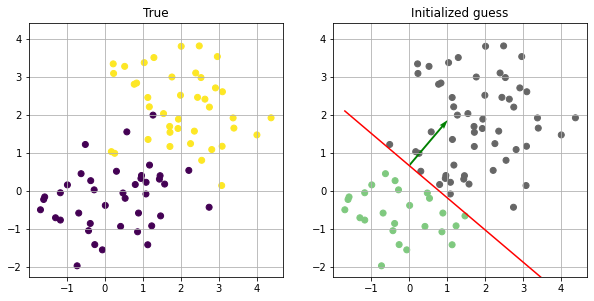

Great. Everything working!


In [18]:
modelo = simplePerceptron(X)

Accuracy: 0.9375, ECM: 10.0
Accuracy: 0.9375, ECM: 10.0
Accuracy: 0.9375, ECM: 10.0
Accuracy: 0.9125, ECM: 14.0
Accuracy: 0.9125, ECM: 14.0
Accuracy: 0.9375, ECM: 10.0
Accuracy: 0.9375, ECM: 10.0
Accuracy: 0.95, ECM: 8.0
Accuracy: 0.95, ECM: 8.0
Accuracy: 0.95, ECM: 8.0


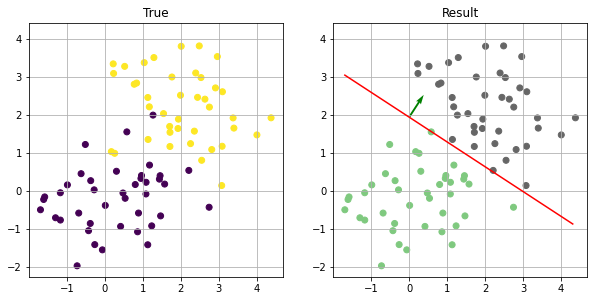

In [20]:
modelo.train(y,n_ep=10,eta=0.01)
modelo.plot('Result')

Vemos que se minimiza el error cuadrático medio y que aumenta la exactitud de clasificación. Como el problema no es linealmente separable, la exactitud nunca podrá llegar al 100% al menos con un clasificador lineal como hemos propuesto. Para esto, tendremos que modificar el modelo propuesto a uno al menos un poco más complejo, como veremos en la siguiente clase.

# Bibliografía y recursos útil:

- [Libro de Michael Nielsen](http://neuralnetworksanddeeplearning.com/)

- [Artículo de Dorian Lazar en towardsdatascience.com](https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1)

- [Siempre Wikipedia](https://es.wikipedia.org/wiki/Perceptr%C3%B3n)
